## Sprint アンサンブル学習

## 小さなデータセットの用意

以前も利用した回帰のデータセットを用意します。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

この中の`train.csv`をダウンロードし、目的変数として`SalePrice`、説明変数として、`GrLivArea`と`YearBuilt`を使います。

train.csvを学習用（train）8割、検証用（val）2割に分割してください。

In [1]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
X = df_train.loc[:, ['GrLivArea', 'YearBuilt']].values
y = df_train.loc[:, 'SalePrice'].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 2), (292, 2), (1168,), (292,))

## scikit-learn
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。

[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [7]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)
en_pred = en.predict(X_test)

In [8]:
from sklearn.svm import SVR
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [9]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [12]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

/Users/ikeda/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [13]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(3, 3, 3,) , random_state=0, max_iter=1500)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
en_mse = mean_squared_error(y_test, en_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
kn_mse = mean_squared_error(y_test, kn_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)
nn_mse = mean_squared_error(y_test, nn_pred)

print('単一モデルの平均二乗誤差')
print('Linear : {:,.0f}'.format(lr_mse))
print('Ridge : {:,.0f}'.format(ridge_mse))
print('Lasso : {:,.0f}'.format(lasso_mse))
print('ElasticNet : {:,.0f}'.format(en_mse))
print('SVR : {:,.0f}'.format(svr_mse))
print('KNeighborsRegressor : {:,.0f}'.format(kn_mse))
print('DecisionTreeRegressor : {:,.0f}'.format(dtr_mse))
print('RandomForestRegressor : {:,.0f}'.format(rfr_mse))
print('LGBMRegressor : {:,.0f}'.format(lgbm_mse))
print('MLPRegressor : {:,.0f}'.format(nn_mse))

単一モデルの平均二乗誤差
Linear : 2,942,066,922
Ridge : 2,942,067,018
Lasso : 2,942,067,002
ElasticNet : 2,942,123,470
SVR : 4,874,222,158
KNeighborsRegressor : 3,119,613,674
DecisionTreeRegressor : 3,009,170,128
RandomForestRegressor : 1,829,102,497
LGBMRegressor : 1,980,418,356
MLPRegressor : 3,860,298,016


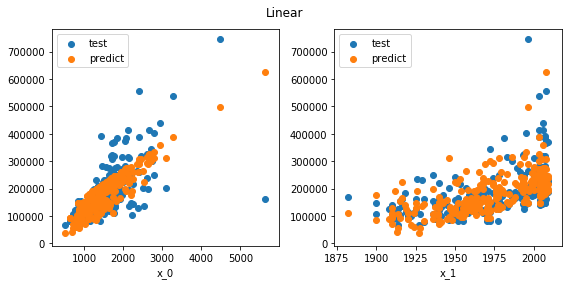

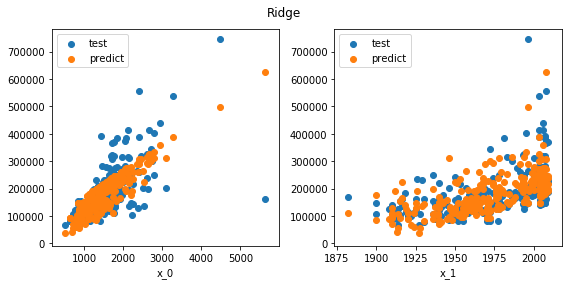

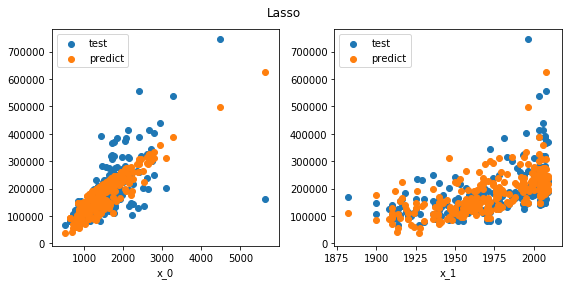

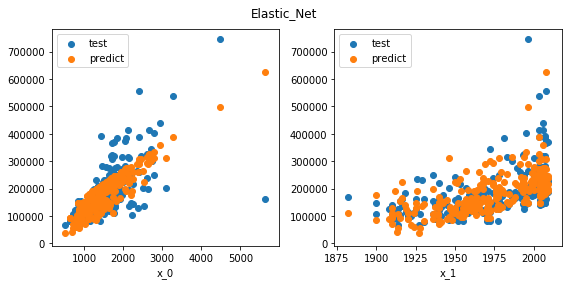

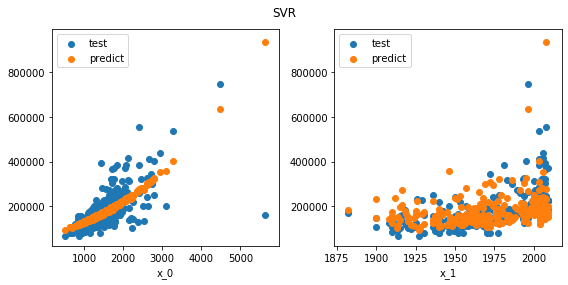

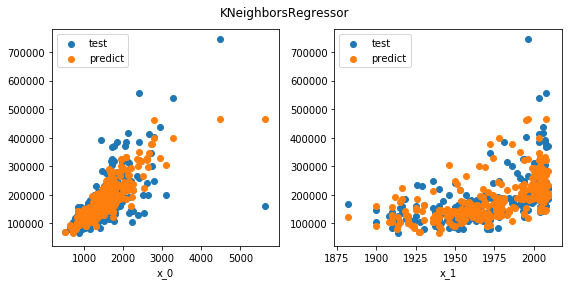

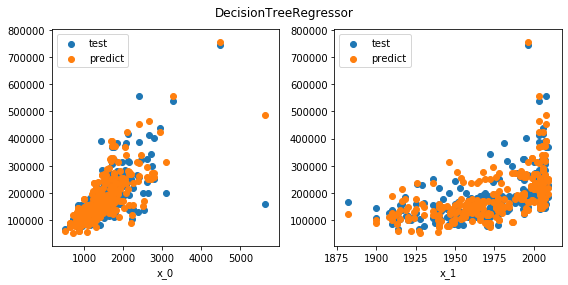

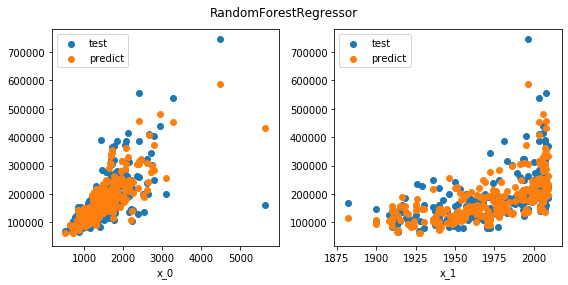

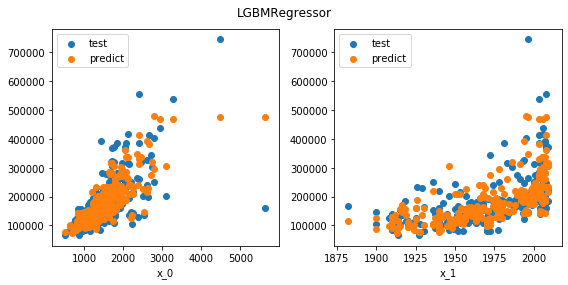

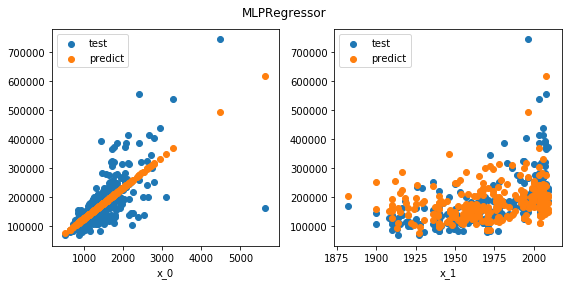

In [15]:
#　予測値とテストデータをプロット
import matplotlib.pyplot as plt
%matplotlib inline
pred_lst = [lr_pred, ridge_pred, lasso_pred, en_pred, svr_pred, kn_pred, dtr_pred, rfr_pred, lgbm_pred, nn_pred]
model_title = ['Linear', 'Ridge', 'Lasso', 'Elastic_Net', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor','LGBMRegressor', 'MLPRegressor']
for i in range(len(pred_lst)):
    fig = plt.figure(figsize=(X_test.shape[1]*4, 4))
    for j in range(X_test.shape[1]):
        ax = fig.add_subplot(1, X_test.shape[1], j+1)
        ax.scatter(X_test[:, j], y_test, label='test')
        ax.scatter(X_test[:, j], pred_lst[i], label='predict')
        ax.set_xlabel('x_{}'.format(j))
        ax.legend()
    fig.suptitle(model_title[i])
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

## 【問題1】ブレンディングのスクラッチ実装

**ブレンディング** をスクラッチ実装し、単一モデルより精度があがる例を **最低3つ** 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。

## ブレンディングとは

ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。

- 手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
- ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
- 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。

回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。

**《補足》**

分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。

[sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

### パターン1
- 複数モデルを学習させ、それぞれの学習モデルの予測の平均値 or 中央値 or log平均を逆変換した値を返す

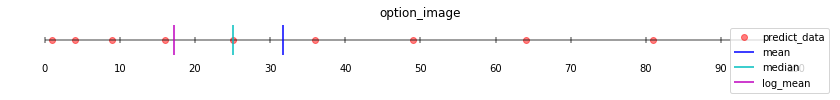

In [16]:
pred_data = [i**2 for i in range(1, 10)]
#数直線
import pylab
fig,ax=plt.subplots(figsize=(12, 12)) #画像サイズ
fig.set_figheight(1) #高さ調整
ax.tick_params(labelbottom=True, bottom=False) #x軸設定
ax.tick_params(labelleft=False, left=False) #y軸設定
y = [0] * len(pred_data)

xmin, xmax= 0,100 #数直線の最小値・最大値
plt.tight_layout() #グラフの自動調整
plt.scatter(pred_data, y, c='r', marker='o', label='predict_data', alpha=0.5) #散布図
plt.hlines(y=0,xmin=xmin,xmax=xmax, alpha=0.5) #横軸
plt.vlines(x=np.mean(pred_data), ymin=-0.5, ymax=0.5, label='mean', colors='b')
plt.vlines(x=np.median(pred_data), ymin=-0.5, ymax=0.5, label='median', colors='c')
plt.vlines(x=np.exp(np.mean(np.log(pred_data))), ymin=-0.5, ymax=0.5, label='log_mean', colors='m')
line_width=10 #目盛り数値の刻み幅
plt.vlines(x=[i for i in range(xmin,xmax+1,10)],ymin=-0.1,ymax=0.1, alpha=0.5) #目盛り線（大）
# plt.vlines(x=[i/10 for i in range(xmin*10,xmax*10+1,10)],ymin=-0.02,ymax=0.02) #目盛り線（小）
plt.xticks(np.arange(xmin,xmax+line_width,line_width)) #目盛り数値
plt.legend()
plt.title('option_image')
pylab.box(False) #枠を消す

In [17]:
class ScratchBlendingModel():
    '''
    複数のモデルを学習させ、予測をするスクラッチを実装
    
    Parameters
    -----
    model : list
      学習させたいモデルオブジェクトのリスト
    option : 'meadian', 'mean'
      予測値の出力方法
    '''
    def __init__(self, model, option='mean'):
        #　ハイパーパラメーターを属性として記録
        self.model = model
        self.n_models = len(self.model)
        self.option = option
        
    def fit(self, X, y):
        '''
        学習させたいモデルオブジェクトをそれぞれ学習させる
        '''
        for i in range(self.n_models):
            self.model[i].fit(X, y)
    
    def predict(self, X, option=None):
        '''
        学習したモデルオブジェクトをそれぞれ予測し、オプションに応じて予測値を計算
        option : 'meadian', 'mean'
        予測値の出力方法
        '''
        if option is None:
            option = self.option
        
        pred_array = np.zeros(self.n_models * X.shape[0]).reshape(self.n_models, -1)
        for i in range(self.n_models):
            pred_array[i] = self.model[i].predict(X)
        
        if option == 'mean':
            return np.mean(pred_array, axis=0)
        elif option == 'median':
            return np.median(pred_array, axis=0)
        elif option == 'log_mean':
            pred_array_log = np.log(pred_array)
            return np.exp(np.mean(pred_array_log, axis=0))

In [18]:
# LinearRegression, SVR, DecisionTreeRegressor
model1 = [lr, svr, dtr]

In [19]:
scratch_bm = ScratchBlendingModel(model1)
scratch_bm.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

ScratchBlendingModel option_mean : 2,852,115,033
ScratchBlendingModel option_median : 2,802,121,052
ScratchBlendingModel option_log_mean : 2,789,205,606


- 平均二乗誤差の改善が見られた
- 元々平均二乗誤差の大きかったSVRを外して、他の回帰モデルを入れてみる

In [20]:
# LinearRegression, Ridge, Lasso, Elastic_Net, SVR, KNeighborsRegressor, DecisionTreeRegressor
model2 = [lr, ridge, lasso, en, svr, kn, dtr]

In [21]:
scratch_bm = ScratchBlendingModel(model2)
scratch_bm.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

ScratchBlendingModel option_mean : 2,755,338,836
ScratchBlendingModel option_median : 2,941,939,413
ScratchBlendingModel option_log_mean : 2,740,303,291


- それぞれの予測値の平均で計算すれば平均二乗誤差の改善が見られたが、大きな改善は見られなかった
- 元のモデルの精度が悪いSVRを除外する

In [22]:
### LinearRegression, Ridge, Lasso, Elastic_Net, KNeighborsRegressor, DecisionTreeRegressor
model3 = [lr, ridge, lasso, en, kn, dtr]

In [23]:
scratch_bm = ScratchBlendingModel(model3)
scratch_bm.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

ScratchBlendingModel option_mean : 2,590,231,317
ScratchBlendingModel option_median : 2,942,002,354
ScratchBlendingModel option_log_mean : 2,604,148,617


- 過去の中で一番の改善が見られた
- model3では、似たような線形モデルを複数使用しているため、過学習が進んでしまった可能性ある？

In [24]:
### LinearRegression, DecisionTreeRegressor
model4 = [lr, dtr]

In [25]:
scratch_bm = ScratchBlendingModel(model4)
scratch_bm.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bm.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

ScratchBlendingModel option_mean : 2,430,337,776
ScratchBlendingModel option_median : 2,430,337,776
ScratchBlendingModel option_log_mean : 2,429,402,645


- 線形回帰と決定木の組み合わせでスコアの改善が見られた
- アルゴリズムの性格が異なるブレンドは有効であると考えられる

### パターン2
- 決定木の深さを指定したパターンを複数学習させ、予測値の平均or中央値を返す
- 決定木はmax_depthのdefaultがNoneであるため、過学習が進んでしまっている可能性があると想定

In [26]:
from sklearn.tree import DecisionTreeRegressor
class ScratchBlendingDecisionTreeRegressor():
    '''
    指定した深さの決定木を複数を学習させ、予測をするスクラッチを実装
    
    Parameters
    -----
    depth_patterns : Iteration
      決定木のmax_depthのパターン
    random_state : int
      乱数の設定
    option : 'meadian', 'mean'
      予測値の出力方法
    '''
    def __init__(self, depth_patterns, random_state=None, option='mean'):
        #　ハイパーパラメーターを属性として記録
        self.depth_patterns = sorted(list(depth_patterns))
        self.random_state = random_state
        self.option = option
        # 学習器を格納する
        self.model = []
        # 学習した深さのパターン
        self.max_depth = []
        # 学習したモデルのパラメーターを保管する
        self.feature_importances_ = []
        
    def fit(self, X, y):
        '''
        depth毎に学習させる
        '''
        for depth in self.depth_patterns:
            dtr = DecisionTreeRegressor(random_state=self.random_state, max_depth=depth)
            dtr.fit(X, y)
            # 一つ前の学習器とパラメーターが同じの時はスキップ
            if self.feature_importances_  and np.all(dtr.feature_importances_ == self.feature_importances_[-1]):
                continue
            else:
                self.model.append(dtr)
                self.max_depth.append(depth)
                self.feature_importances_.append(dtr.feature_importances_)
    
    def predict(self, X, option=None):
        '''
        学習したモデルオブジェクトをそれぞれ予測し、オプションに応じて予測値を計算
        option : 'meadian', 'mean'
        予測値の出力方法
        '''
        if option is None:
            option = self.option
        
        pred_array = np.zeros(len(self.max_depth) * X.shape[0]).reshape(len(self.max_depth), -1)
        for i in range(len(self.max_depth)):
            pred_array[i] = self.model[i].predict(X)
        
        if option == 'mean':
            return np.mean(pred_array, axis=0)
        elif option == 'median':
            return np.median(pred_array, axis=0)
        elif option == 'log_mean':
            pred_array_log = np.log(pred_array)
            return np.exp(np.mean(pred_array_log, axis=0))

In [27]:
max_depth_patterns1 = range(2, 50)
scratch_bdtr = ScratchBlendingDecisionTreeRegressor(max_depth_patterns1, random_state=0)
scratch_bdtr.fit(X_train, y_train)
print('max_depth_patterns : {}'.format(scratch_bdtr.max_depth))

mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

max_depth_patterns : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
ScratchBlendingModel option_mean : 2,243,646,061
ScratchBlendingModel option_median : 2,751,875,991
ScratchBlendingModel option_log_mean : 2,241,133,687


- max_depthが22前後で学習が止まっている様子が伺える
- defaultパラメーターの１つの決定木より、平均二乗誤差は改善している
- max_depthの刻む幅を広げてみる

In [28]:
max_depth_patterns2 = range(2, 50, 3)
scratch_bdtr = ScratchBlendingDecisionTreeRegressor(max_depth_patterns2, random_state=0)
scratch_bdtr.fit(X_train, y_train)
print('max_depth_patterns : {}'.format(scratch_bdtr.max_depth))

mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

max_depth_patterns : [2, 5, 8, 11, 14, 17, 20, 23]
ScratchBlendingModel option_mean : 2,228,793,107
ScratchBlendingModel option_median : 2,645,679,208
ScratchBlendingModel option_log_mean : 2,226,795,117


- 多少改善したが、pattern1と比較して大きな改善は見受けられない

In [29]:
max_depth_patterns3 = [2**i for i in range(1, 50)]
scratch_bdtr = ScratchBlendingDecisionTreeRegressor(max_depth_patterns3, random_state=0)
scratch_bdtr.fit(X_train, y_train)
print('max_depth_patterns : {}'.format(scratch_bdtr.max_depth))

mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='mean'))
print('ScratchBlendingModel option_mean : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='median'))
print('ScratchBlendingModel option_median : {:,.0f}'.format(mse))
mse = mean_squared_error(y_test, scratch_bdtr.predict(X_test, option='log_mean'))
print('ScratchBlendingModel option_log_mean : {:,.0f}'.format(mse))

max_depth_patterns : [2, 4, 8, 16, 32]
ScratchBlendingModel option_mean : 2,148,030,416
ScratchBlendingModel option_median : 2,276,408,904
ScratchBlendingModel option_log_mean : 2,200,205,332


- 更に僅かな改善が見られた
- 決定木モデルは、depthを深くしすぎないで、バランスよく学習に織り交ぜることが重要

### パターン3
- 特徴量、目的変数をいくつかのパターンで scaleさせて予測値を算出する
- 特徴量
    - Not_scale
    - log_scale
    - Standard_scale
    - Robust_Scale
- 目的変数
    - Not_scale
    - log_scale
    - root_scale
    - reciprocal_scale

In [30]:
from copy import deepcopy
class ScratchBlendingScale():
    '''
    目的変数、特徴量を複数パターンでscale、学習させ、予測をするスクラッチを実装
    
    Parameters
    -----
    　X_scale : iterable
      scaleするパターン　'not', 'log', 'std', 'robust'
    y_sclale : iterable
      scaleするパターン　'not', 'log', 'root', 'recipropal'
    '''
    def __init__(self, model, X_scale=['not', 'log'], y_scale=['not', 'log'], option='mean'):
        #　ハイパーパラメーターを属性として記録
        self.model = model
        self.X_scale = X_scale
        self.y_scale = y_scale
        self.option = option
        # 学習したモデルを保管するリスト
        self.models_lst = []
        # scaleしたパターンを保管するリスト(X_scale, y_scale)
        self.scale_patterns = []
        # std, robust　のためのオブジェクト
        self.std = None
        self.robust = None
        
    def fit(self, X_train, y_train):
        '''
        それぞれデータをスケールさせて学習させる
        '''
        
        for x in self.X_scale:
            # 変換させるXをコピー
            X_copy = deepcopy(X_train)
            
            # X_scaleのパターンに応じてX_copyを変換
            if x == 'not':
                X_scl = X_copy
            elif x == 'log':
                X_scl = np.log(X_copy)
            elif x == 'std':
                from sklearn.preprocessing import StandardScaler
                self.std = StandardScaler()
                X_scl = self.std.fit_transform(X_copy)
            elif x == 'robust':
                from sklearn.preprocessing import RobustScaler
                self.robust = RobustScaler()
                X_scl = self.robust.fit_transform(X_copy)

            for y in self.y_scale:
                #　変換させるyをコピー
                y_copy = deepcopy(y_train)
                    
                # y_scaleのパターンに応じてy_copyを変換
                if y == 'not':
                    y_scl = y_copy
                elif y == 'log':
                    y_scl = np.log(y_copy)
                elif y == 'root':
                    y_scl = np.sqrt(y_copy)
                elif y == 'reciprocal':
                    y_scl = np.reciprocal(y_copy, dtype=np.float64)
                
                # modelを呼び出し、学習
                model = deepcopy(self.model)
                model.fit(X_scl, y_scl)
                #　モデルのインスタンスと変換パターンをリストへ
                self.models_lst.append(model)
                self.scale_patterns.append((x, y))
    
    def predict(self, X_test, option=None):
        '''
        学習したモデルオブジェクト、それぞれの変換パターンで予測
        オプションに応じて予測値を計算
        
        option : 'meadian', 'mean'
        予測値の出力方法
        '''
        if option is None:
            option = self.option
        
        pred_array = np.zeros(len(self.models_lst) * X_test.shape[0]).reshape(-1, X_test.shape[0])
        
        for i in range(len(self.models_lst)):
            #　x、yの変換パターンを呼び出す
            x, y = self.scale_patterns[i]
            #　Xをデータ変換
            X_copy = deepcopy(X_test)
            # xのパターンに応じて変換
            if x == 'not':
                X_scl = X_copy
            elif x == 'log':
                X_scl = np.log(X_copy)
            elif x == 'std':
                X_scl = self.std.transform(X_copy)
            elif x == 'robust':
                X_scl = self.robust.transform(X_copy)
            
            # 変換したデータをもとに予測
            pred = self.models_lst[i].predict(X_scl)
            # yのパターンに応じて逆変換
            if y == 'not':
                pred_scl = pred
            elif y == 'log':
                pred_scl = np.exp(pred)
            elif y == 'root':
                pred_scl = np.power(pred, 2)
            elif y == 'reciprocal':
                pred_scl = 1 / pred
            
            #予測した結果を保管
            pred_array[i] = pred_scl
        self.check = pred_array
        if option == 'mean':
            return np.mean(pred_array, axis=0)
        elif option == 'median':
            return np.median(pred_array, axis=0)
        elif option == 'log_mean':
            pred_array_log = np.log(pred_array)
            return np.exp(np.mean(pred_array_log, axis=0))

In [31]:
def test_calc(x, y, X_train, y_train, X_test, model):
    # return predict
    
    # X_scaleのパターンに応じてXを変換
    if x == 'not':
        X_train = X_train
        X_test = X_test
    elif x == 'log':
        X_train = np.log(X_train)
        X_test = np.log(X_test)
    elif x == 'std':
        from sklearn.preprocessing import StandardScaler
        std = StandardScaler()
        X_train = std.fit_transform(X_train)
        X_test = std.transform(X_test)
    elif x == 'robust':
        from sklearn.preprocessing import RobustScaler
        robust = RobustScaler()
        X_train = robust.fit_transform(X_train)
        X_test = robust.transform(X_test)
        
    # y_scaleのパターンに応じてyを変換、学習と予測
    if y == 'not':
        y_train = y_train
        pred = model.fit(X_train, y_train).predict(X_test)
        return pred
    elif y == 'log':
        y_train = np.log(y_train)
        pred = model.fit(X_train, y_train).predict(X_test)
        return np.exp(pred)
    elif y == 'root':
        y_train = np.sqrt(y_train)
        pred = model.fit(X_train, y_train).predict(X_test)
        return np.power(pred, 2)
    elif y == 'reciprocal':
        y_train = np.reciprocal(y_train, dtype=np.float64)
        pred = model.fit(X_train, y_train).predict(X_test)
        return 1 / pred

- 線形回帰で複数のscaleパターンを試してみる

In [32]:
model = LinearRegression()
X_scale = ['not', 'log', 'std', 'robust']
y_scale = ['not', 'log', 'root', 'reciprocal']

for x in X_scale:
    for y in y_scale:
        pred = test_calc(x, y, X_train, y_train, X_test, model)
        mse = mean_squared_error(y_test, pred)
        print('SingleModel X_scale : {}, y_scale : {} , mse : {:,.0f}'.format(x, y, mse))

scratch_bscl = ScratchBlendingScale(model, X_scale, y_scale)
scratch_bscl.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='mean'))
print('ScratchBlendingScale option_mean : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))
mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='median'))
print('ScratchBlendingScale option_median : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))

SingleModel X_scale : not, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : not, y_scale : log , mse : 8,652,238,180
SingleModel X_scale : not, y_scale : root , mse : 3,421,486,609
SingleModel X_scale : not, y_scale : reciprocal , mse : 9,295,043,507,768
SingleModel X_scale : log, y_scale : not , mse : 2,900,226,699
SingleModel X_scale : log, y_scale : log , mse : 2,729,954,884
SingleModel X_scale : log, y_scale : root , mse : 2,708,898,159
SingleModel X_scale : log, y_scale : reciprocal , mse : 374,568,576,725
SingleModel X_scale : std, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : std, y_scale : log , mse : 8,652,238,180
SingleModel X_scale : std, y_scale : root , mse : 3,421,486,609
SingleModel X_scale : std, y_scale : reciprocal , mse : 9,295,043,507,767
SingleModel X_scale : robust, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : robust, y_scale : log , mse : 8,652,238,180
SingleModel X_scale : robust, y_scale : root , mse : 3,421,486,609
SingleModel

- 誤差が大きく出ているy_scale : log, y_scale : reciprocal　を除外して再度トライ

In [33]:
model = LinearRegression()
X_scale = ['not', 'log', 'std', 'robust']
y_scale = ['not', 'root'] #'log'　'reciprocal'を消去

for x in X_scale:
    for y in y_scale:
        pred = test_calc(x, y, X_train, y_train, X_test, model)
        mse = mean_squared_error(y_test, pred)
        print('SingleModel X_scale : {}, y_scale : {} , mse : {:,.0f}'.format(x, y, mse))

scratch_bscl = ScratchBlendingScale(model, X_scale, y_scale)
scratch_bscl.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='mean'))
print('ScratchBlendingScale option_mean : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))
mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='median'))
print('ScratchBlendingScale option_median : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))

SingleModel X_scale : not, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : not, y_scale : root , mse : 3,421,486,609
SingleModel X_scale : log, y_scale : not , mse : 2,900,226,699
SingleModel X_scale : log, y_scale : root , mse : 2,708,898,159
SingleModel X_scale : std, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : std, y_scale : root , mse : 3,421,486,609
SingleModel X_scale : robust, y_scale : not , mse : 2,942,066,922
SingleModel X_scale : robust, y_scale : root , mse : 3,421,486,609
ScratchBlendingScale option_mean : 2,959,968,809
X_scale : ['not', 'log', 'std', 'robust'], y_scale : ['not', 'root']
ScratchBlendingScale option_median : 2,886,008,985
X_scale : ['not', 'log', 'std', 'robust'], y_scale : ['not', 'root']


- 何もスケールさせていない単一モデルと比較して誤差に僅かな改善が見られたが、X_scale : log, y_scale : root　がベストスコアとなっている
- 線形回帰では、誤差を二乗を最小化するアルゴリズムであり、特徴量を標準化させた結果が反映されない
- 距離ベースのKneighborsで試してみる

In [34]:
model = KNeighborsRegressor()
X_scale = ['not', 'log', 'std', 'robust']
y_scale = ['not', 'log', 'root', 'reciprocal']

for x in X_scale:
    for y in y_scale:
        pred = test_calc(x, y, X_train, y_train, X_test, model)
        mse = mean_squared_error(y_test, pred)
        print('SingleModel X_scale : {}, y_scale : {} , mse : {:,.0f}'.format(x, y, mse))

scratch_bscl = ScratchBlendingScale(model, X_scale, y_scale)
scratch_bscl.fit(X_train, y_train)

mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='mean'))
print('ScratchBlendingScale option_mean : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))
mse = mean_squared_error(y_test, scratch_bscl.predict(X_test, option='median'))
print('ScratchBlendingScale option_median : {:,.0f}'.format(mse))
print('X_scale : {}, y_scale : {}'.format(X_scale, y_scale))

SingleModel X_scale : not, y_scale : not , mse : 3,119,613,674
SingleModel X_scale : not, y_scale : log , mse : 3,064,531,064
SingleModel X_scale : not, y_scale : root , mse : 3,081,850,943
SingleModel X_scale : not, y_scale : reciprocal , mse : 3,089,586,481
SingleModel X_scale : log, y_scale : not , mse : 3,091,937,444
SingleModel X_scale : log, y_scale : log , mse : 3,050,125,769
SingleModel X_scale : log, y_scale : root , mse : 3,061,034,862
SingleModel X_scale : log, y_scale : reciprocal , mse : 3,085,800,239
SingleModel X_scale : std, y_scale : not , mse : 2,138,338,489
SingleModel X_scale : std, y_scale : log , mse : 2,133,377,649
SingleModel X_scale : std, y_scale : root , mse : 2,128,420,862
SingleModel X_scale : std, y_scale : reciprocal , mse : 2,192,190,544
SingleModel X_scale : robust, y_scale : not , mse : 2,094,304,284
SingleModel X_scale : robust, y_scale : log , mse : 2,096,472,906
SingleModel X_scale : robust, y_scale : root , mse : 2,086,823,558
SingleModel X_scale :

- 距離ベースのアルゴリズムであるので、特徴量を標準化させた効果は大きく出ているが、y_scaleの効果はほとんど異なっていないように思われる

## 【問題2】バギングのスクラッチ実装

**バギング** をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

## バギングとは

バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（ **ブートストラップサンプル** ）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。

[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。

推定結果の平均をとる部分はブースティングと同様の実装になります。

In [35]:
from copy import deepcopy
class ScratchBagging():
    '''
    複数のモデルを学習させ、予測をするスクラッチを実装
    
    Parameters
    -----
    model : object
      学習させたいモデルのオブジェクト
    n_boostrap :
    　　ブーストラップサンプルの数
    '''
    def __init__(self, model, n_boostrap, random_state=None):
        #　ハイパーパラメーターを属性として記録
        self.model = model
        # ブーストラップサンプルの数
        self.n_boostrap = n_boostrap
        # 乱数を設定
        self.random_state=random_state
        #　学習したモデルを格納するリスト
        self.model_lst = None
        
    def fit(self, X, y):
        '''
        学習するオブジェクトをn_boostrap回、学習させる
        '''
        
        self.model_lst = []
        
        # KFoldクラスでクロスバリデーションを行うためインポート
        from sklearn.model_selection import KFold
        
        # KFold　のオブジェクトを作成
        kf = KFold(n_splits=self.n_boostrap, shuffle=True, random_state=self.random_state)
        
        #　ランダムに学習用のインデックスを取得してデータを割り当て
        for _, random_index in kf.split(X):
            # 学習して、モデルをリストへ格納
            model = deepcopy(self.model)
            model.fit(X[random_index], y[random_index])
            self.model_lst.append(model)
    
    def predict(self, X):
        '''
        学習したモデルオブジェクトをそれぞれ予測し、平均の予測値を計算
        '''
        
        pred_array = np.zeros(self.n_boostrap * X.shape[0]).reshape(self.n_boostrap, -1)
        for i in range(self.n_boostrap):
            pred_array[i] = self.model_lst[i].predict(X)
        
        return np.mean(pred_array, axis=0)

- 各モデルでループを回し、単一モデルの誤差を下回ったものを出力

In [36]:
print('LinearRegression 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(lr_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=lr, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < lr_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

LinearRegression 単一モデルの平均二乗誤差
SingleModel : 2,942,066,922
ScratchBagging n_boostrap=2 : 2,939,013,766
ScratchBagging n_boostrap=4 : 2,939,500,375
ScratchBagging n_boostrap=7 : 2,927,563,129
ScratchBagging n_boostrap=8 : 2,939,800,900
ScratchBagging n_boostrap=11 : 2,940,409,162
ScratchBagging n_boostrap=12 : 2,935,733,689
ScratchBagging n_boostrap=14 : 2,927,913,830
ScratchBagging n_boostrap=17 : 2,918,959,473
ScratchBagging n_boostrap=19 : 2,940,698,704
ScratchBagging n_boostrap=21 : 2,921,870,753
ScratchBagging n_boostrap=22 : 2,930,492,221
ScratchBagging n_boostrap=24 : 2,932,495,134
ScratchBagging n_boostrap=25 : 2,936,268,102
ScratchBagging n_boostrap=26 : 2,930,133,474
ScratchBagging n_boostrap=27 : 2,937,233,083
ScratchBagging n_boostrap=28 : 2,930,169,733
ScratchBagging n_boostrap=29 : 2,926,695,988


In [37]:
print('Ridge 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(ridge_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=ridge, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < ridge_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

Ridge 単一モデルの平均二乗誤差
SingleModel : 2,942,067,018
ScratchBagging n_boostrap=2 : 2,939,013,942
ScratchBagging n_boostrap=4 : 2,939,500,725
ScratchBagging n_boostrap=7 : 2,927,563,879
ScratchBagging n_boostrap=8 : 2,939,801,464
ScratchBagging n_boostrap=11 : 2,940,409,997
ScratchBagging n_boostrap=12 : 2,935,734,456
ScratchBagging n_boostrap=14 : 2,927,914,878
ScratchBagging n_boostrap=17 : 2,918,959,967
ScratchBagging n_boostrap=19 : 2,940,700,323
ScratchBagging n_boostrap=21 : 2,921,872,535
ScratchBagging n_boostrap=22 : 2,930,493,990
ScratchBagging n_boostrap=24 : 2,932,497,468
ScratchBagging n_boostrap=25 : 2,936,270,689
ScratchBagging n_boostrap=26 : 2,930,135,535
ScratchBagging n_boostrap=27 : 2,937,235,459
ScratchBagging n_boostrap=28 : 2,930,172,257
ScratchBagging n_boostrap=29 : 2,926,698,591


In [38]:
print('Lasso 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(lasso_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=lasso, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < lasso_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

Lasso 単一モデルの平均二乗誤差
SingleModel : 2,942,067,002
ScratchBagging n_boostrap=2 : 2,939,013,835
ScratchBagging n_boostrap=4 : 2,939,500,448
ScratchBagging n_boostrap=7 : 2,927,563,235
ScratchBagging n_boostrap=8 : 2,939,800,955
ScratchBagging n_boostrap=11 : 2,940,409,218
ScratchBagging n_boostrap=12 : 2,935,733,732
ScratchBagging n_boostrap=14 : 2,927,913,895
ScratchBagging n_boostrap=17 : 2,918,959,491
ScratchBagging n_boostrap=19 : 2,940,698,793
ScratchBagging n_boostrap=21 : 2,921,870,829
ScratchBagging n_boostrap=22 : 2,930,492,284
ScratchBagging n_boostrap=24 : 2,932,495,226
ScratchBagging n_boostrap=25 : 2,936,268,198
ScratchBagging n_boostrap=26 : 2,930,133,545
ScratchBagging n_boostrap=27 : 2,937,233,165
ScratchBagging n_boostrap=28 : 2,930,169,824
ScratchBagging n_boostrap=29 : 2,926,696,074


In [39]:
print('ElasticNet 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(en_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=en, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < en_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

ElasticNet 単一モデルの平均二乗誤差
SingleModel : 2,942,123,470
ScratchBagging n_boostrap=2 : 2,939,065,541
ScratchBagging n_boostrap=4 : 2,939,551,803
ScratchBagging n_boostrap=7 : 2,927,625,982
ScratchBagging n_boostrap=8 : 2,939,842,400
ScratchBagging n_boostrap=11 : 2,940,453,756
ScratchBagging n_boostrap=12 : 2,935,771,263
ScratchBagging n_boostrap=14 : 2,927,957,790
ScratchBagging n_boostrap=17 : 2,918,976,736
ScratchBagging n_boostrap=19 : 2,940,748,587
ScratchBagging n_boostrap=21 : 2,921,920,464
ScratchBagging n_boostrap=22 : 2,930,539,487
ScratchBagging n_boostrap=24 : 2,932,552,107
ScratchBagging n_boostrap=25 : 2,936,328,895
ScratchBagging n_boostrap=26 : 2,930,180,081
ScratchBagging n_boostrap=27 : 2,937,284,609
ScratchBagging n_boostrap=28 : 2,930,222,707
ScratchBagging n_boostrap=29 : 2,926,748,543


In [40]:
print('SVR 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(svr_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=svr, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < svr_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

SVR 単一モデルの平均二乗誤差
SingleModel : 4,874,222,158


In [41]:
print('KNeighborsRegressor 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(kn_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=kn, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < kn_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

KNeighborsRegressor 単一モデルの平均二乗誤差
SingleModel : 3,119,613,674
ScratchBagging n_boostrap=2 : 2,925,018,642
ScratchBagging n_boostrap=3 : 2,920,538,216
ScratchBagging n_boostrap=4 : 2,900,442,505
ScratchBagging n_boostrap=5 : 2,910,792,766
ScratchBagging n_boostrap=6 : 3,020,363,161
ScratchBagging n_boostrap=7 : 3,047,687,081
ScratchBagging n_boostrap=8 : 3,111,404,717


In [42]:
print('DecisionTreeRegressor 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(dtr_mse))

for n_boostrap in range(2, 30):
    scratch_bagging = ScratchBagging(model=dtr, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < dtr_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

DecisionTreeRegressor 単一モデルの平均二乗誤差
SingleModel : 3,009,170,128
ScratchBagging n_boostrap=3 : 1,902,197,639
ScratchBagging n_boostrap=4 : 2,200,179,028
ScratchBagging n_boostrap=5 : 2,372,657,263
ScratchBagging n_boostrap=6 : 2,280,823,306
ScratchBagging n_boostrap=7 : 2,211,292,199
ScratchBagging n_boostrap=8 : 2,324,617,911
ScratchBagging n_boostrap=9 : 2,334,322,661
ScratchBagging n_boostrap=10 : 2,093,534,079
ScratchBagging n_boostrap=11 : 2,231,908,683
ScratchBagging n_boostrap=12 : 2,293,923,419
ScratchBagging n_boostrap=13 : 2,304,458,815
ScratchBagging n_boostrap=14 : 2,565,534,785
ScratchBagging n_boostrap=15 : 2,372,585,568
ScratchBagging n_boostrap=16 : 2,345,665,942
ScratchBagging n_boostrap=17 : 2,422,670,984
ScratchBagging n_boostrap=18 : 2,414,451,812
ScratchBagging n_boostrap=19 : 2,264,844,857
ScratchBagging n_boostrap=20 : 2,374,434,684
ScratchBagging n_boostrap=21 : 2,425,671,822
ScratchBagging n_boostrap=22 : 2,362,285,643
ScratchBagging n_boostrap=23 : 2,498,930,273

In [43]:
print('RandomForestRegressor 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(rfr_mse))

for n_boostrap in range(2, 5):
    scratch_bagging = ScratchBagging(model=rfr, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < rfr_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

RandomForestRegressor 単一モデルの平均二乗誤差
SingleModel : 1,829,102,497


In [44]:
print('LGBMRegressor 単一モデルの平均二乗誤差')
print('SingleModel : {:,.0f}'.format(lgbm_mse))

for n_boostrap in range(2, 5):
    scratch_bagging = ScratchBagging(model=lgbm, n_boostrap=n_boostrap, random_state=0)
    scratch_bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, scratch_bagging.predict(X_test))
    if mse < rfr_mse:
        print('ScratchBagging n_boostrap={} : {:,.0f}'.format(n_boostrap, mse))

LGBMRegressor 単一モデルの平均二乗誤差
SingleModel : 1,980,418,356
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


- SVRは精度があがらず、KNeighborRegressorはn_boostrap:8超では精度が上がるのがストップした。サポートベクトルを選んだり、近傍な点を探すアルゴリズムであるため、データを分割して学習すると、境界線のばらつきだけが大きくなり上手く分類できないのでは、と想定
- 決定木では。バギングするとRandomForestのようなアルゴリズムになるため、アンサンブル学習が進み精度が上がったと思われる
- アンサンブル系のRandomForest, lightgbmではオブジェクトをデフォルト値で作成しており、デフォルトで学習器が１００個であるため、このデータセットの約1000超のサイズではバギングしても効果ないと想定（そもそもパラメーターを調整できる）

## 【問題3】スタッキングのスクラッチ実装

スタッキング をスクラッチ実装し、単一モデルより精度があがる例を **最低1つ** 示してください。

## スタッキングとは

スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは 
$K_0=3, M_0=2$ 
程度にします。

**《学習時》**

（ステージ $0$ ）

- 学習データを $K_0$ 個に分割する。
- 分割した内の $(K_0 - 1)$ 個をまとめて学習用データ、残り $1$ 個を推定用データとする組み合わせが $K_0$ 個作れる。
- あるモデルのインスタンスを $K_0$ 個用意し、異なる学習用データを使い学習する。
- それぞれの学習済みモデルに対して、使っていない残り $1$ 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
- さらに、異なるモデルのインスタンスも $K_0$ 個用意し、同様のことを行う。モデルが $M_0$ 個あれば、 $M_0$ 個のブレンドデータが得られる。

（ステージ $n$ ）

- ステージ $n-1$ のブレンドデータを$M_n-1$ 次元の特徴量を持つ学習用データと考え、 $K_n$ 個に分割する。以下同様である。

（ステージ $N$ ）＊最後のステージ

- ステージ $N-1$ の $M_N-1$ 個のブレンドデータを$M_N-1$ 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

**《推定時》**

（ステージ $0$ ）

- テストデータを $K_0 \times M_0$ 個の学習済みモデルに入力し、$K_0 \times M_0$ 個の推定値を得る。これを $K_0$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ $n$ ）

- ステージ $n-1$ で得たブレンドテストを $K_n \times M_n$ 個の学習済みモデルに入力し、$K_n \times M_n$ 個の推定値を得る。これを $K_n$ の軸で平均値を求め $M_0$ 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージ $N$ ）＊最後のステージ

- ステージ $N-1$ で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [45]:
from copy import deepcopy
class ScratchStackingRegressor():
    '''
    スタッキングにより、予測するスクラッチを実装
    
    Parameters
    -----
    models : list
      ブレンドデータを作成するための学習器をlistでいれる
    final_model : object
      最終的な推定を行うモデル
    cv :　int
    　　ブレンドデータ作成時に交差検証する数
    stage : int
      ブレンドデータを作成するステージ数
    '''
    def __init__(self, models, final_model, cv=3, stage=1, random_state=None):
        #　ハイパーパラメーターを属性として記録
        self.models = models
        self.final_model = final_model
        self.cv = cv
        self.stage = stage
        # ブレンドデータ作成時に使用する学習器の数
        self.n_models = len(self.models)
        # 乱数を設定
        self.random_state=random_state
        # ステージ毎に学習した学習器のリスト  index　がステージ数、models　* cv　の学習器をいれる
        self.models_lst = []
        
    def fit(self, X, y):
        '''
        学習
        '''
        # 変数を管理
        self.learning_data = X
        self.n_samples, _ = self.learning_data.shape
        
        
        # 交差検証の乱数設定
        if type(self.random_state) == int:
            np.random.seed(self.random_state)
        # KFoldクラスでクロスバリデーションを行うためインポート
        from sklearn.model_selection import KFold
        
        #　ステージの回数分、繰り返す
        for n_stage in range(self.stage):
            
            # KFold　のオブジェクトを作成
            kf = KFold(n_splits=self.cv, shuffle=False)
            # 推定した値をいれる変数を作成 shape (self.n_models, self.n_samples)
            pred = np.zeros(self.n_models*self.n_samples).reshape(self.n_models, -1)
            
            # 分割毎に学習した学習器を保存、　self.cv ×　self.n_models
            stage_lst = []
            
            #　学習用と推定用のインデックスを取得してデータを割り当て
            for train_index, val_index in kf.split(self.learning_data):
                X_train, X_val = self.learning_data[train_index], self.learning_data[val_index]
                y_train = y[train_index]
                
                # 今の分割データの学習器を保存、1　×　self.n_models
                clf_lst = []
                # ブレンドデータ作成のための学習器を呼び出す
                for i in range(self.n_models):
                    # deepcopy で学習器を呼び出さないとバグがでる？
                    clf = deepcopy(self.models[i])
                    # 学習
                    clf.fit(X_train, y_train)
                    #　予測
                    y_pred = clf.predict(X_val)
                    # 予測データをpredに保管、i行目は学習器の順番、val_indexは予測したデータのインデックス
                    pred[i, val_index] = y_pred
                    # 学習器を保管
                    clf_lst.append(clf)
                #今の分割データにおいて学習が終わったら、clf_lstをstage_lstへ追加
                stage_lst.append(clf_lst)
            #　今のステージで交差検証が終了
            # 予測データを転置して、self.learning_dataへ代入
            self.learning_data = pred.T
            # 今のステージで学習した学習器をself.models_lstへ追加
            self.models_lst.append(stage_lst)
        
        #　ステージの繰り返しが終わったら、最終的なモデル学習を行う
        self.final_model.fit(self.learning_data, y)
        
    def predict(self, X):
        '''
        予測
        '''
        # 変数を管理
        self.val_data = X
        self.n_pred, _ = self.val_data.shape
        
        #　ステージの回数分、繰り返す
        for n_stage in range(self.stage):
            # n_stage　で学習した学習器のリストを呼び出す
            stage_lst = self.models_lst[n_stage]
            # 推定した値をいれる変数を作成 shape (self.n_models, self.n_pred)
            pred = np.zeros(self.n_models * self.n_pred).reshape(self.n_models, -1)            
            
            # clf_lstを呼び出す cross_validation毎の別々のモデルが格納されている
            for clf_lst in stage_lst:
                # self.n_models　繰り返す
                for i in range(self.n_models):
                    #　i 番目の学習器で予測して、pred[i]に加算
                    clf = clf_lst[i]
                    # print(clf)
                    y_pred = clf.predict(self.val_data)
                    pred[i] += y_pred
            # clf_lstのループが終わったら、predをself.cvで割って平均を算出
            pred = pred / self.cv
            # 予測データを転置して、self.val_dataへ代入
            self.val_data = pred.T
        
        #　ステージの繰り返しが終わったら、最終的なモデルで予測を行う
        return self.final_model.predict(self.val_data)

- 弱学習器をLinearRegression, DecisionTreeRegressor, SVR　の３つを選択し、 最終最終の学習器にRidgeを入れて、データの分割個数、ステージ数を複数試す

In [46]:
models = [lr, dtr ,svr]
final_model = ridge
for n_cv in range(2, 6):
    for n_stage in range(1, 6):
        scratch_stacking = ScratchStackingRegressor(models, final_model, cv=n_cv, stage=n_stage, random_state=0)
        scratch_stacking.fit(X_train, y_train)
        mse = mean_squared_error(y_test, scratch_stacking.predict(X_test))
        print('ScratchStacking cv : {} stage : {} mse : {:,.0f}'.format(n_cv, n_stage, mse))

ScratchStacking cv : 2 stage : 1 mse : 2,758,375,935
ScratchStacking cv : 2 stage : 2 mse : 2,394,024,258
ScratchStacking cv : 2 stage : 3 mse : 3,040,644,362
ScratchStacking cv : 2 stage : 4 mse : 2,845,886,701
ScratchStacking cv : 2 stage : 5 mse : 3,581,822,430
ScratchStacking cv : 3 stage : 1 mse : 2,596,301,996
ScratchStacking cv : 3 stage : 2 mse : 2,291,758,263
ScratchStacking cv : 3 stage : 3 mse : 2,532,798,694
ScratchStacking cv : 3 stage : 4 mse : 2,612,242,735
ScratchStacking cv : 3 stage : 5 mse : 3,670,266,948
ScratchStacking cv : 4 stage : 1 mse : 2,457,707,032
ScratchStacking cv : 4 stage : 2 mse : 2,233,819,327
ScratchStacking cv : 4 stage : 3 mse : 2,510,936,879
ScratchStacking cv : 4 stage : 4 mse : 2,217,519,359
ScratchStacking cv : 4 stage : 5 mse : 2,648,071,635
ScratchStacking cv : 5 stage : 1 mse : 2,319,995,706
ScratchStacking cv : 5 stage : 2 mse : 2,146,678,172
ScratchStacking cv : 5 stage : 3 mse : 1,913,680,480
ScratchStacking cv : 5 stage : 4 mse : 1,954,9

In [47]:
from sklearn.ensemble import StackingRegressor
estimators = [('lr', LinearRegression()), 
               ('dtr', DecisionTreeRegressor(random_state=0)),
               ('svr', SVR(kernel='poly'))]
for n_cv in range(2, 6):
    sklearn = StackingRegressor(estimators=estimators,
                                final_estimator=Ridge(),
                                cv=n_cv, passthrough=False)
    sklearn.fit(X_train, y_train)
    mse = mean_squared_error(y_test, sklearn.predict(X_test))
    print('SklearnStacking cv : {} stage : {} mse : {:,.0f}'.format(n_cv, 1, mse))

SklearnStacking cv : 2 stage : 1 mse : 2,663,341,688
SklearnStacking cv : 3 stage : 1 mse : 2,627,226,250
SklearnStacking cv : 4 stage : 1 mse : 2,595,037,416
SklearnStacking cv : 5 stage : 1 mse : 2,483,296,229


- 入れる学習器を変更して試す

In [48]:
lr = LinearRegression()
dtr=DecisionTreeRegressor(max_depth=7, random_state=0)
svr = SVR(kernel='poly')
rfr = RandomForestRegressor(random_state=0)
def mse(model):
    return mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test))
print('LinearRegression_Singel_mse : {:,.0f}'.format(mse(lr)))
print('DecisionTreeRegressor_Singel_mse : {:,.0f}'.format(mse(dtr)))
print('SVR_Singel_mse : {:,.0f}'.format(mse(svr)))
print('RandomForestRegressor_Singel_mse : {:,.0f}'.format(mse(rfr)))

LinearRegression_Singel_mse : 2,942,066,922
DecisionTreeRegressor_Singel_mse : 1,996,751,335
SVR_Singel_mse : 4,874,222,158
RandomForestRegressor_Singel_mse : 1,829,102,497


In [49]:
models = [lr, dtr, svr]
final_model = rfr
for n_cv in range(2, 6):
    for n_stage in range(1, 6):
        scratch_stacking = ScratchStackingRegressor(models, final_model,
                                                    cv=n_cv, stage=n_stage, random_state=0)
        scratch_stacking.fit(X_train, y_train)
        mse = mean_squared_error(y_test, scratch_stacking.predict(X_test))
        print('ScratchStacking cv : {} stage : {} mse : {:,.0f}'.format(n_cv, n_stage, mse))

ScratchStacking cv : 2 stage : 1 mse : 2,196,847,602
ScratchStacking cv : 2 stage : 2 mse : 2,415,797,704
ScratchStacking cv : 2 stage : 3 mse : 2,595,455,388
ScratchStacking cv : 2 stage : 4 mse : 2,731,154,450
ScratchStacking cv : 2 stage : 5 mse : 3,482,018,593
ScratchStacking cv : 3 stage : 1 mse : 2,062,222,046
ScratchStacking cv : 3 stage : 2 mse : 1,871,500,144
ScratchStacking cv : 3 stage : 3 mse : 2,133,611,241
ScratchStacking cv : 3 stage : 4 mse : 2,733,713,042
ScratchStacking cv : 3 stage : 5 mse : 3,047,796,904
ScratchStacking cv : 4 stage : 1 mse : 2,244,227,104
ScratchStacking cv : 4 stage : 2 mse : 2,399,600,704
ScratchStacking cv : 4 stage : 3 mse : 2,009,238,870
ScratchStacking cv : 4 stage : 4 mse : 2,611,426,921
ScratchStacking cv : 4 stage : 5 mse : 2,935,787,255
ScratchStacking cv : 5 stage : 1 mse : 1,655,654,550
ScratchStacking cv : 5 stage : 2 mse : 2,315,624,127
ScratchStacking cv : 5 stage : 3 mse : 1,881,644,468
ScratchStacking cv : 5 stage : 4 mse : 2,135,9

In [50]:
from sklearn.ensemble import StackingRegressor
estimators = [('lr', LinearRegression()), 
               ('dtr', DecisionTreeRegressor(random_state=0, max_depth=7)),
               ('svr', SVR(kernel='poly'))]
for n_cv in range(2, 6):
    sklearn = StackingRegressor(estimators=estimators,
                                final_estimator=RandomForestRegressor(random_state=0),
                                cv=n_cv, passthrough=False)
    sklearn.fit(X_train, y_train)
    mse = mean_squared_error(y_test, sklearn.predict(X_test))
    print('SklearnStacking cv : {} stage : {} mse : {:,.0f}'.format(n_cv, 1, mse))

SklearnStacking cv : 2 stage : 1 mse : 2,401,157,018
SklearnStacking cv : 3 stage : 1 mse : 2,165,471,364
SklearnStacking cv : 4 stage : 1 mse : 2,307,074,956
SklearnStacking cv : 5 stage : 1 mse : 1,848,734,964


- スクラッチのcv : 5, stage : 1　がベストスコア
- Stackingで単一モデルよりも誤差改善ができた